# Customer Personality Analysis
<hr>

# Table of Content

- [Introduction](#1)
    - [About this Notebook](#1.1)
    - [About this Dataset](#1.2)
- [Preparation](#2)

<a id='1'></a>
# 1 Introduction
<a id='1.1'></a>
## 1.1 About This Notebook
In this Notebook, I will do the EDA base on <a href=https://www.analyticsvidhya.com/blog/2021/05/exploratory-data-analysis-eda-a-step-by-step-guide/>this article</a>, using Data from <a href=https://www.kaggle.com/imakash3011/customer-personality-analysis>Customer Personality Analysis Dataset</a> on Kaggle
<a id='1.2'></a>
## 1.2 About this Dataset
*For more information, <a href=https://www.kaggle.com/imakash3011/customer-personality-analysis>click here</a>*

**Context**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

**Content**

People
- `ID`: Customer's unique identifier
- `Year_Birth`: Customer's birth year
- `Education`: Customer's education level
- `Marital_Status`: Customer's marital status
- `Income`: Customer's yearly household income
- `Kidhome`: Number of children in customer's household
- `Teenhome`: Number of teenagers in customer's household
- `Dt_Customer`: Date of customer's enrollment with the company
- `Recency`: Number of days since customer's last purchase
- `Complain`: 1 if customer complained in the last 2 years, 0 otherwise

Products
- `MntWines`: Amount spent on wine in last 2 years
- `MntFruits`: Amount spent on fruits in last 2 years
- `MntMeatProducts`: Amount spent on meat in last 2 years
- `MntFishProducts`: Amount spent on fish in last 2 years
- `MntSweetProducts`: Amount spent on sweets in last 2 years
- `MntGoldProds`: Amount spent on gold in last 2 years

Promotion
- `NumDealsPurchases`: Number of purchases made with a discount
- `AcceptedCmp1`: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- `AcceptedCmp2`: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- `AcceptedCmp3`: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- `AcceptedCmp4`: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- `AcceptedCmp5`: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- `Response`: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place
- `NumWebPurchases`: Number of purchases made through the company’s web site
- `NumCatalogPurchases`: Number of purchases made using a catalogue
- `NumStorePurchases`: Number of purchases made directly in stores
- `NumWebVisitsMonth`: Number of visits to company’s web site in the last month

<a id='2'></a>
# 2 Preparation
- Import Packages
- Pandas Display settings
- Load the Data

In [1]:
# Import Packages
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Pandas Display settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_excel('./datasets/marketing-campaign.xlsx')

<a id='3'></a>
# 3 Exploratory Data Analysis - EDA

## 3.1 Take a Quick Look

In [3]:
print('Number of Attributes: {}'.format(df.shape[1]))
print('Number of Entries   : {}'.format(df.shape[0]))

Number of Attributes: 29
Number of Entries   : 2240


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Observations:**
- The Raw Data has `29` Attributes and `2240` Entries, which is quite big to me.
- `3/29` Attributes are Object, the remaining are number, with `1` is float and `3` are integer.
- Fortunately (but not really), the Data has only `1` attribute contains missing value, **`Income`** $\rightarrow$ Impute it with proper value later.

## 3.2 Discriptive Statistics
Now we have a better sense of our data, we should looke a little deeper using Discriptive Statistics.

In [5]:
# For Numeric Attributes
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
# For Object (String) Attributes
df.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


**Observations:**
- Some distributions of the Data may in a good shape, since their `mean` and `median` are fairly close (for instance, Year_Birth has `mean` `1968.8` and `median` `1970`, just around `1` off).
- But nothing is sure here, we better visualize our data for a better sense of comprehension.

<a id='4'></a>
# 4 Visualization
## 4.1 Univariate Analysis
We will start with looking at the distribution of each Attribute, since the Data has a quite number of attributes, we have to be carefull here.

We will use **bar plot** for the distribution of non-numerical attributes

But there is something we have to do first:
- Attribute `Dt_Customer` is a Time Series Attribute, which is pretty hard to plot (just because I don't know how to plot this kind of Data).
- My solution is binning them into bins, separated by `Year`, and store them as a new attribute `Dt_Customer_Year`.

In [27]:
# Extract Year from Dt_Customer
df['Dt_Customer_Year'] = [df['Dt_Customer'][i][-4:] for i in range(df.shape[0])]

In [29]:
df['Dt_Customer_Year'].value_counts()

2013    1189
2014     557
2012     494
Name: Dt_Customer_Year, dtype: int64

<AxesSubplot:>

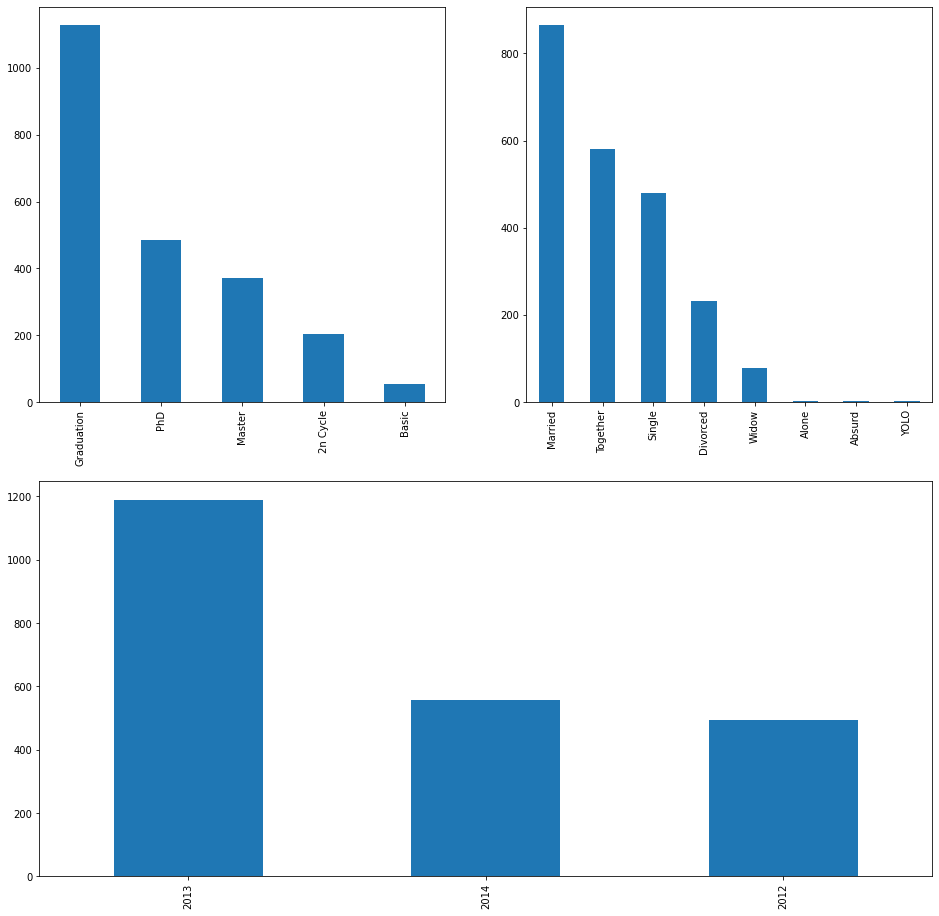

In [30]:
fig = plt.figure(figsize=(16, 16))
gridspec = fig.add_gridspec(2, 2)

ax0 = fig.add_subplot(gridspec[0, 0])
df['Education'].value_counts().plot(kind='bar', ax=ax0)
ax1 = fig.add_subplot(gridspec[0, 1])
df['Marital_Status'].value_counts().plot(kind='bar', ax=ax1)
ax2 = fig.add_subplot(gridspec[1, :])
df['Dt_Customer_Year'].value_counts().plot(kind='bar', ax=ax2)